In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook",font_scale=1.2)
import pandas as pd
# disable setting with copy warning
pd.options.mode.chained_assignment = None
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import pydicom

In [9]:
metrics = (
    f"test/old_subgroupAUROC", f"test/young_subgroupAUROC",
    f"test/female_subgroupAUROC", f"test/male_subgroupAUROC",
    f"test/AUROC"
)

In [10]:
def load_csvs_into_df(dir):
    dirs = [os.path.join(dir,d) for d in os.listdir(dir) if os.path.isdir(os.path.join(dir,d))]
    dfs = []
    sample_dfs = []
    for d in dirs:
        seeds = [f for f in os.listdir(os.path.join('./',d)) if f.startswith('seed')]
        # get last number from directory name
        train_loader_num = int(d.split('_')[-1])
        for seed in seeds:
            #print(os.path.join(d,seed))
            results = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('test_results')][0]
            sample_info = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('train_loader')][0]
            results_df = pd.read_csv(os.path.join(d, seed, results))
            sample_df = pd.read_csv(os.path.join(d, seed, sample_info))
            results_df["train_loader_num"] = train_loader_num
            sample_df["train_loader_num"] = train_loader_num
            dfs.append(results_df)
            sample_dfs.append(sample_df)
    return pd.concat(dfs, ignore_index=True), pd.concat(sample_dfs, ignore_index=True)

In [12]:
df_1_fae, df_samples_1_fae= load_csvs_into_df('src/logs_persist/dataset_distillation/distillation_paper/2023-11-03 14:14:39-FAE-rsna-balanced-bs32-balanced-dataset-distillation-fullmodel-nsamples1-noDP')
df_1_fae["model"] = "FAE"
df_samples_1_fae.shape

In [17]:
df = df_1_fae[[*metrics,'model']]

In [18]:
df = pd.melt(df, id_vars=['model'], var_name="metric", value_name="value")
#df.metric = df.metric.str.replace(metrics[1], groups[1])
#df.metric = df.metric.str.replace(metrics[0], groups[0])
df.head()

,model,metric,value
0,FAE,test/old_subgroupAUROC,0.61485
1,FAE,test/old_subgroupAUROC,0.43350
2,FAE,test/old_subgroupAUROC,0.64340
3,FAE,test/old_subgroupAUROC,0.51520
4,FAE,test/old_subgroupAUROC,0.60645


value                               \
                                  count      mean       std      min   
model metric                                                           
FAE   test/AUROC                 8450.0  0.532999  0.072235  0.25155   
      test/female_subgroupAUROC  8450.0  0.507494  0.060992  0.26080   
      test/male_subgroupAUROC    8450.0  0.558505  0.103277  0.23885   
      test/old_subgroupAUROC     8450.0  0.555900  0.086881  0.23170   
      test/young_subgroupAUROC   8450.0  0.510098  0.068768  0.26535   

                                                                         
                                      25%       50%       75%       max  
model metric                                                             
FAE   test/AUROC                 0.484162  0.545975  0.589684  0.702913  
      test/female_subgroupAUROC  0.471500  0.513050  0.551650  0.658950  
      test/male_subgroupAUROC    0.483913  0.578600  0.642150  0.762525  
      test/old_subgroupAUROC     0.499250  0.570800  0.623788  0.731250  
      test/young_subgroupAUROC   0.462612  0.518700  0.563350  0.701975

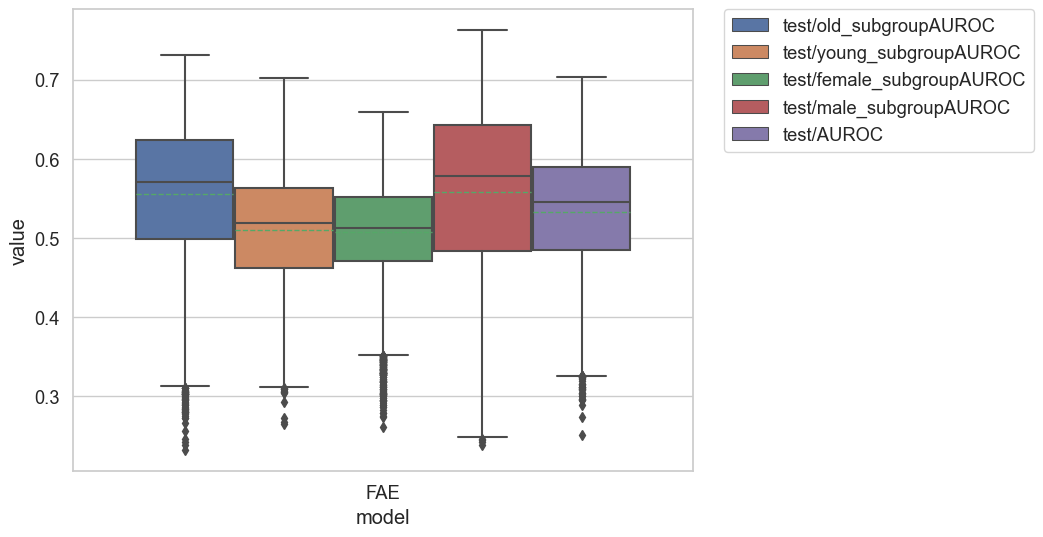

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="model", y="value", hue="metric", meanline=True, showmeans=True)
# legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# get statistics from each metric per model
df.groupby(["model","metric"]).describe()